<a href="https://colab.research.google.com/github/Tina-Gh/PyTorch/blob/main/PytorchDocumentation/PyTorch_Documentation_IntroductionToPyTorchYouTubeSeries(IntroductionToPyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> 1. Tensor:

In [1]:
import torch # for all things PyTorch
import torch.nn as nn # for torch.nn.Module, the parent object for PyTorch modules
import torch.nn.functional as F # for teh activation function
import torch.optim as optim

In [2]:
z = torch.zeros(5, 3)
print(f"Z: {z}")
print(f"type: {z.dtype}") #torch default is: torch.float32 which is also ideal for GPU.

Z: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
type: torch.float32


In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(f"i: {i}")
print(f"type: {i.dtype}")

i: tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
type: torch.int16


In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print(f"r1: {r1} \n")

r2 = torch.rand(2, 2)
print(f"r2: {r2} \n")

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print(f"r3: {r3} \n")

r1: tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]]) 

r2: tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]]) 

r3: tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]]) 



In [5]:
ones = torch.ones(2, 3)
print(f"ones: {ones} \n")

twos = torch.ones(2, 3) * 2
print(f"twos: {twos} \n")

threes = ones + twos
print(f"threes: {threes}")
print(f"shape: {threes.shape} \n")

# r1 = torch.rand(2, 3)
# r2 = torch.rand(3, 2)
# r3 = r1 + r2 #should give error since r1 and r2 have different shapes
# print(f"r3: {r3}")

ones: tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

twos: tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

threes: tensor([[3., 3., 3.],
        [3., 3., 3.]])
shape: torch.Size([2, 3]) 



In [6]:
r = (torch.rand(2, 2) - 0.5) * 2 #values between -1 and 1
print(f"r: {r} \n")
print(f"Abs(r): {torch.abs(r)} \n")
print(f"inverse sine(r): {torch.asin(r) * 360 / (2*torch.pi)} \n") #in degrees
print(f"determinant(r): {torch.det(r)} \n")
print(f"svd(r): {torch.svd(r)} \n")
print(f"standard mean(r): {torch.std_mean(r)} \n")
print(f"max(r): {torch.max(r)}")

r: tensor([[-0.1568, -0.8619],
        [-0.5336, -0.1907]]) 

Abs(r): tensor([[0.1568, 0.8619],
        [0.5336, 0.1907]]) 

inverse sine(r): tensor([[ -9.0210, -59.5298],
        [-32.2464, -10.9929]]) 

determinant(r): -0.4299735724925995 

svd(r): torch.return_types.svd(
U=tensor([[-0.9135, -0.4069],
        [-0.4069,  0.9135]]),
S=tensor([0.9370, 0.4589]),
V=tensor([[ 0.3846, -0.9231],
        [ 0.9231,  0.3846]])) 

standard mean(r): (tensor(0.3312), tensor(-0.4357)) 

max(r): -0.15679681301116943


In [7]:
x = torch.randn(1, 10)
prev_h = torch.randn(1, 20)
w_x = torch.randn(20, 10, requires_grad=True)
w_h = torch.randn(20, 20, requires_grad=True)

i2h = torch.mm(w_x, x.t())
h2h = torch.mm(w_h, prev_h.t())
next_h = torch.tanh(i2h + h2h)

loss = next_h.sum()
loss.backward()
print(w_h.grad, w_x.grad, loss)

tensor([[-0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00,  0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00,
         -0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
          0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00],
        [-3.0994e-03, -4.9168e-03, -1.5278e-03,  4.4449e-03,  6.0700e-04,
         -5.0620e-03, -4.3243e-03, -3.3197e-03, -1.1357e-03,  2.4492e-03,
         -4.5949e-04, -8.7501e-05,  2.6230e-03, -1.2844e-03,  4.6893e-03,
          2.3894e-03, -6.3782e-03, -5.0649e-03,  6.5142e-03, -1.1123e-03],
        [-3.3321e-05, -5.2860e-05, -1.6425e-05,  4.7786e-05,  6.5258e-06,
         -5.4421e-05, -4.6490e-05, -3.5689e-05, -1.2210e-05,  2.6331e-05,
         -4.9399e-06, -9.4071e-07,  2.8200e-05, -1.3809e-05,  5.0414e-05,
          2.5688e-05, -6.8572e-05, -5.4452e-05,  7.0034e-05, -1.1958e-05],
        [-1.3333e-02, -2.1150e-02, -6.5720e-03,  1.9120e-02,  2.6111e-03,
         -2.1775e-02, -1.8601e-02, 

# <b> 2. Model

In [8]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__() # or super(LeNet, self).__init__()

    # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16*5*5, 120) # 5*5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), 2)
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:] # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [9]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32) # stand-in for a 32x32 black & white image
print(f"input shape: {input.shape}")

output = net(input)
print(f"output of the model: {output} \n")
print(f"shape of the output: {output.shape}")

# Looking at the shape of output, we can see that it also has a batch dimension, the size of which should always match the input batch dimension.
# i.e., if we had passed in an input batch of 16 instances, output would have a shape of (16, 10).

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
input shape: torch.Size([1, 1, 32, 32])
output of the model: tensor([[ 0.0238, -0.0180, -0.1051, -0.0325,  0.0500,  0.0794, -0.0247,  0.0822,
         -0.0630,  0.0572]], grad_fn=<AddmmBackward0>) 

shape of the output: torch.Size([1, 10])


# <b> 3. Datasets & DataLoaders:

In [10]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

# for visualizing some of the data:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# transforms.Normalize():
# adjusts the values of the tensor so that their average is zero and their standard deviation is 1.0.
# Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.
# The values passed to the transform are the means (first tuple) and the standard deviations (second tuple) of the rgb values of the images in the dataset.

In [12]:
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:12<00:00, 13.2MB/s]


 frog  ship horse   cat


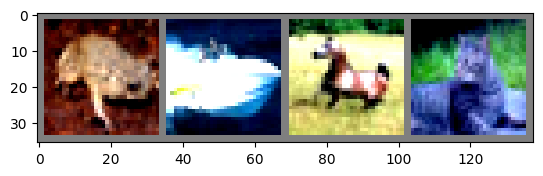

In [13]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter) # images are of size 32*32, rgb, and we chose 4 batches: torch.Size([4, 3, 32, 32]) and the labels are of size: torch.Size([4])

# show the images:
imshow(torchvision.utils.make_grid(images))
# print labels:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# <b>4. Training the model:

#### 1. The data:

In [14]:
# prepare the data: (we'l do it again since the previous section was for practice)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

<generator object <genexpr> at 0x7a0f924a0450>
 frog  ship horse   cat


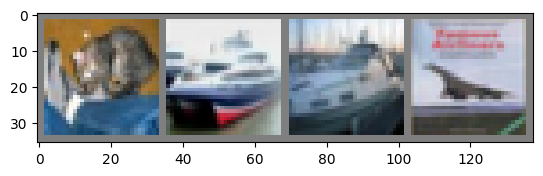

In [15]:
# again, show an example image:

images_, labels_ = next(iter(testloader)) #or on trainloader
imshow(torchvision.utils.make_grid(images_))
print(labels_[j] for j in range(4))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
images_[0]

tensor([[[ 0.2392,  0.2471,  0.2941,  ...,  0.0745, -0.0118, -0.0902],
         [ 0.1922,  0.1843,  0.2471,  ...,  0.0667, -0.0196, -0.0667],
         [ 0.1843,  0.1843,  0.2392,  ...,  0.0902,  0.0196, -0.0588],
         ...,
         [-0.4667, -0.6706, -0.7569,  ..., -0.7020, -0.8980, -0.6863],
         [-0.5216, -0.6157, -0.7255,  ..., -0.7961, -0.7725, -0.8431],
         [-0.5765, -0.5608, -0.6471,  ..., -0.8118, -0.7333, -0.8353]],

        [[-0.1216, -0.1294, -0.0902,  ..., -0.2549, -0.2863, -0.3333],
         [-0.1216, -0.1373, -0.1059,  ..., -0.2549, -0.2863, -0.3098],
         [-0.1373, -0.1451, -0.1294,  ..., -0.2314, -0.2549, -0.3020],
         ...,
         [-0.0275, -0.2157, -0.3098,  ..., -0.2392, -0.4980, -0.3333],
         [-0.0902, -0.2000, -0.3333,  ..., -0.3569, -0.3569, -0.4980],
         [-0.1608, -0.1765, -0.3020,  ..., -0.3961, -0.3412, -0.4745]],

        [[-0.6157, -0.6314, -0.6000,  ..., -0.7176, -0.7176, -0.7412],
         [-0.6000, -0.6863, -0.6471,  ..., -0

#### 2. The model:

In [17]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2) # or: 2
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 3. The training loop:

In [23]:
num_epochs = 2
for epoch in range(num_epochs):

  running_loss = 0.0

  # making batches:
  for batch_id, data in enumerate(trainloader, 0): # or tuple (X, y) instead of 'data'
    inputs, labels = data # or X, y

    # zeroing the previous gradients:
    optimizer.zero_grad()

    # net.train()

    outputs = net(inputs) # forward
    loss = criterion(outputs, labels) # calculating loss
    loss.backward() # backward
    optimizer.step() # optimization

    # printing the statistics:
    running_loss += loss.item()
    if batch_id % 2000 == 1999:
      print(f"[{epoch+1:d}, {batch_id+1:5d}] loss: {running_loss/2000:.3f}")
      running_loss = 0.0

print("Finiished Training!")

[1,  2000] loss: 2.127
[1,  4000] loss: 1.764
[1,  6000] loss: 1.621
[1,  8000] loss: 1.545
[1, 10000] loss: 1.499
[1, 12000] loss: 1.431
[2,  2000] loss: 1.370
[2,  4000] loss: 1.355
[2,  6000] loss: 1.332
[2,  8000] loss: 1.294
[2, 10000] loss: 1.287
[2, 12000] loss: 1.240
Finiished Training!


# <b>5. Evaluating the model:

In [61]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data

    outputs = net(images)
    _, predictions = torch.max(outputs.data, 1) # the indeces for max item in each batch of predicted labels
    total += labels.size(0)
    correct += (predictions == labels).sum().item()

print(f"Accuracy of teh model on the test images: {correct*100/total}%")

Accuracy of teh model on the test images: 53.89%


In [ ]:
# The result of the accuracy is clearly not the state of teh art, but it was a small practice model.